<a href="https://www.kaggle.com/code/alamukiiraakha/breast-cancer-eda-and-classification?scriptVersionId=141573901" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-data/breast-cancer-data.csv


In [2]:
import pandas as pd 
data = pd.read_csv('//kaggle//input//breast-cancer-data//breast-cancer-data.csv')
data.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'


In [3]:
data.tail()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'
285,50-59',ge40',40-44',0-2',no',3',left',right_up',no',no-recurrence-events'


In [4]:
data.shape

(286, 10)

In [5]:
data.columns

Index(['age', 'menopause', 'tumer-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiate', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [7]:
data.describe()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,50-59',premeno',30-34',0-2',no',2',left',left_low',no',no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


In [8]:
data.isnull().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64

In [9]:
data.fillna(0)

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'


In [10]:
data['age'].value_counts()

50-59'    96
40-49'    90
60-69'    57
30-39'    36
70-79'     6
20-29'     1
Name: age, dtype: int64

In [11]:
data['menopause'].value_counts()

premeno'    150
ge40'       129
lt40'         7
Name: menopause, dtype: int64

In [12]:
data['class'].value_counts()

no-recurrence-events'    201
recurrence-events'        85
Name: class, dtype: int64

In [13]:
data['irradiate'].value_counts()

no'     218
yes'     68
Name: irradiate, dtype: int64

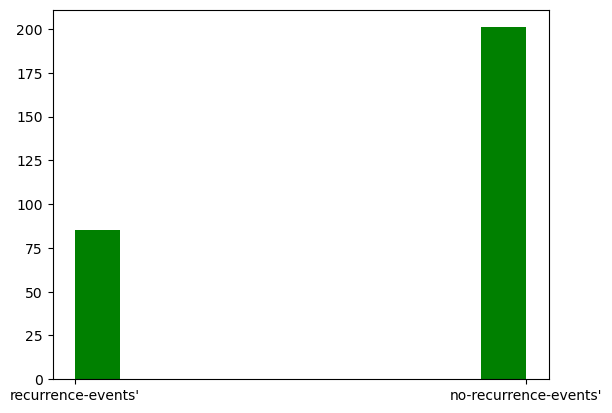

In [14]:
import  matplotlib.pyplot as plt
plt.hist((data['class']), color = 'green')
plt.show()

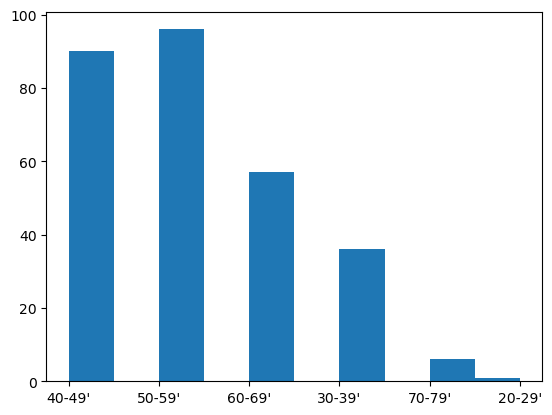

In [15]:
import  matplotlib.pyplot as plt
plt.hist(data['age'])
plt.show()

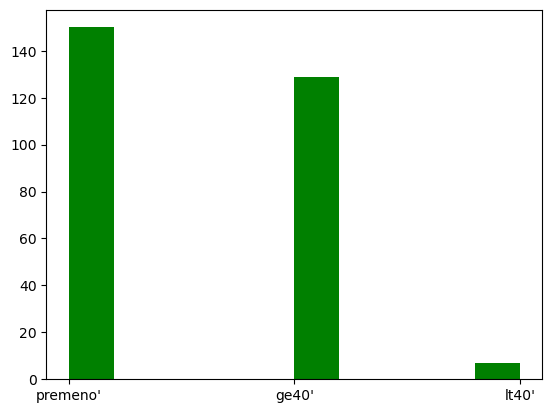

In [16]:
import  matplotlib.pyplot as plt
plt.hist((data['menopause']), color = 'green')
plt.show()

In [17]:
data['irradiate'].value_counts()

no'     218
yes'     68
Name: irradiate, dtype: int64

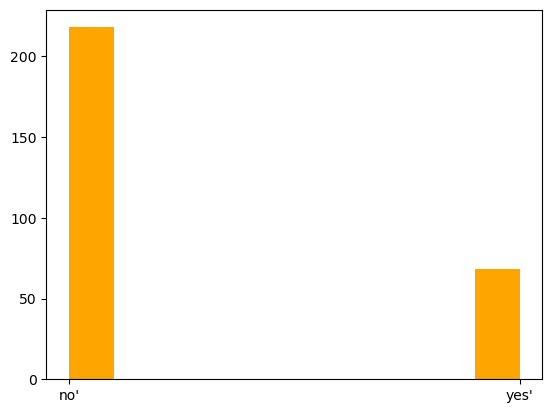

In [18]:
import  matplotlib.pyplot as plt
plt.hist((data['irradiate']), color= 'orange')
plt.show()

In [19]:
data['tumer-size'].value_counts()

30-34'    60
25-29'    54
20-24'    50
15-19'    30
10-14'    28
40-44'    22
35-39'    19
0-4'       8
50-54'     8
5-9'       4
45-49'     3
Name: tumer-size, dtype: int64

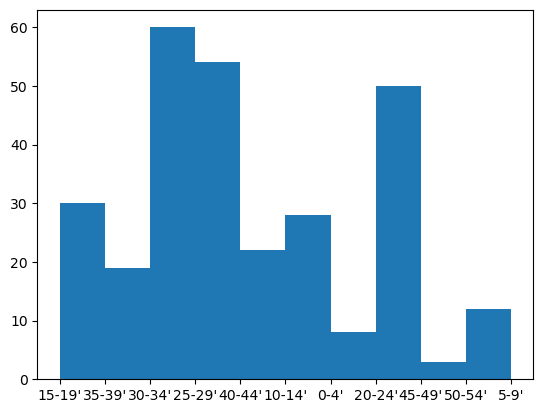

In [20]:
import  matplotlib.pyplot as plt
plt.hist(data['tumer-size'])
plt.show()

In [21]:
df = data.values
x, y = df[:, :-1].astype("str"), df[:, -1].astype("str")

## Classification

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [25]:
x_train.shape

(191, 9)

In [26]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(x_train)
x_train = ordinal_encoder.transform(x_train)
x_test = ordinal_encoder.transform(x_test)

In [27]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [28]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7643979057591623

In [29]:
predictions = model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve

In [31]:
print('accuracy:',accuracy_score(y_test, predictions))
print('precision:',precision_score(y_test, predictions))
print('f1_score:',f1_score(y_test, predictions))
print('recall:',recall_score(y_test, predictions))

accuracy: 0.7368421052631579
precision: 0.9
f1_score: 0.41860465116279066
recall: 0.2727272727272727


In [32]:
print(confusion_matrix(y_test, predictions))

[[61  1]
 [24  9]]


In [33]:
sensitivity_score = recall_score
from sklearn.metrics import precision_recall_fscore_support

In [34]:
print(precision_recall_fscore_support(y_test, predictions))

(array([0.71764706, 0.9       ]), array([0.98387097, 0.27272727]), array([0.82993197, 0.41860465]), array([62, 33]))


In [35]:
def specificity_score(y_true, predictions):
                      p,r,f,s = precision_recall_fscore_support(y_true, predictions)
                      return r[0]
print('specificity_score:',specificity_score(y_test, predictions))

specificity_score: 0.9838709677419355


In [36]:
prob= model.predict_proba(x_test)
fpr, tpr,thresholds = roc_curve(y_test, prob[:,1])

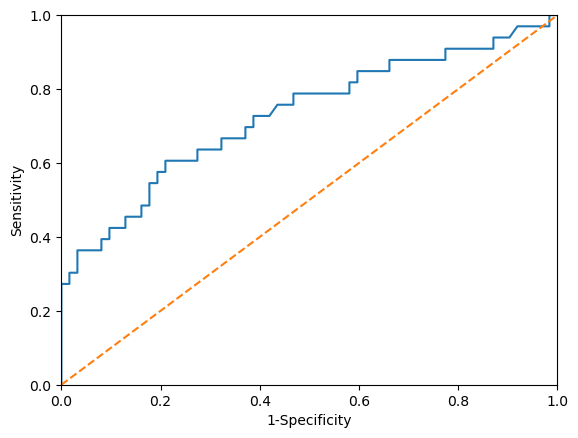

In [37]:
plt.plot(fpr,tpr)  # to plot the roc curve
plt.plot([0,1],[0,1],linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

##  **IF YOU LIKE IT, KINDLY UPVOTE and recommend me for jobs.

# THANKS!!!!!!!!**